# <img style='float: left' width="150px" src="http://1.bp.blogspot.com/-gANdrsx2ceo/VkAzFQYZ8HI/AAAAAAAARXo/r25jef0dij4/s1600/2FNLTensorFlow.png"> <br> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color='#EB8B34'> Example #3: Single-Layer Neural Network</font>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## Load MNIST Data

### MNIST consists of the following datasets:
**train-images-idx3-ubyte.gz** Training set of 55,000 images<br>
**train-labels-idx3-ubyte.gz** Labels corresponding to training images<br>
**t10k-images-idx3-ubyte.gz** Testing set of 10,000 images<br>
**t10k-labels-idx3-ubyte.gz** Labels corresponding to testing images<br>

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print "Number of training images: %d" % (len(mnist.train.images))
print "Number of testing images: %d" % (len(mnist.test.labels))
print "Shape of the vector: %d" % (len(mnist.train.images[0]))

Number of training images: 55000
Number of testing images: 10000
Shape of the vector: 784


In [4]:
# Show the first example label
print mnist.train.labels[0]
print mnist.train.labels[0].argmax()

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
7


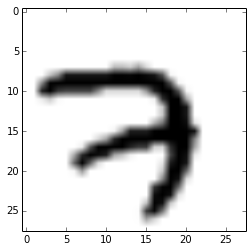

In [5]:
# Visualize the first training example
plt.imshow(np.reshape(mnist.train.images[0], (28,28)), cmap=plt.cm.Greys)
plt.show()

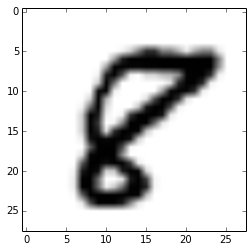

In [6]:
# Visualize the 2022th training example
plt.imshow(np.reshape(mnist.train.images[2021], (28,28)), cmap=plt.cm.Greys)
plt.show()

## Set up the Graph

<img style='center' width="350px" src="perceptron.png">

We set `x` and `y_` to be a placeholder of training examples and their corresponding labels. Each example `x[i]` corresponds to label `y_[i]`.

In [7]:
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])

We now set `W` and `b` to be _trainable_ variables: `W` is the weights matrix, and `b` is the bias term.

In [8]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Below is our model:

In [9]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

### Cross Entropy
Cross entropy will be our loss function. Our goal is to minimize the cross entropy between our predictions and the ground truth.
<br>
<br>
`y` is our prediction
<br>
`y'` is the actual label


<img style='center' width="450px" src="cross_entropy.png">

In [10]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

## Execute the Graph

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

accuracy_history = np.empty(shape=[1], dtype=float)
for i in range(1000):
    # randomly select 100 training data points, compute gradient with that
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    accuracy_history = np.append(accuracy_history, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    if i % 10 == 0:
        print "%d: %s" % (i, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


print "DONE TRAINING"

0: 0.4075
10: 0.8245
20: 0.6986
30: 0.8402
40: 0.8656
50: 0.8545
60: 0.8795
70: 0.8494
80: 0.8624
90: 0.8047
100: 0.894
110: 0.8942
120: 0.8961
130: 0.8968
140: 0.9022
150: 0.9015
160: 0.8817
170: 0.9012
180: 0.8888
190: 0.8999
200: 0.8989
210: 0.9037
220: 0.8941
230: 0.9061
240: 0.9045
250: 0.8878
260: 0.9079
270: 0.9064
280: 0.8886
290: 0.9096
300: 0.9012
310: 0.9026
320: 0.9039
330: 0.9018
340: 0.9116
350: 0.9
360: 0.9103
370: 0.9018
380: 0.8945
390: 0.9134
400: 0.904
410: 0.9009
420: 0.9053
430: 0.9111
440: 0.908
450: 0.9039
460: 0.9143
470: 0.9085
480: 0.886
490: 0.9078
500: 0.9105
510: 0.9142
520: 0.9058
530: 0.9124
540: 0.9112
550: 0.9047
560: 0.9124
570: 0.9164
580: 0.9096
590: 0.9031
600: 0.9132
610: 0.9107
620: 0.916
630: 0.8957
640: 0.9167
650: 0.9131
660: 0.9105
670: 0.9137
680: 0.9165
690: 0.9119
700: 0.9068
710: 0.9133
720: 0.9148
730: 0.9161
740: 0.9179
750: 0.9089
760: 0.9125
770: 0.9137
780: 0.9106
790: 0.9193
800: 0.9155
810: 0.9144
820: 0.912
830: 0.92
840: 0.9133
85

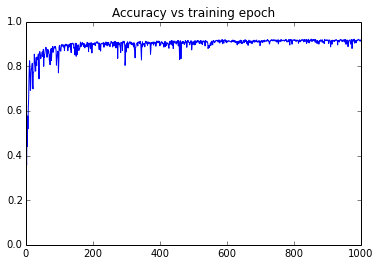

In [12]:
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.title('Accuracy vs training epoch')
plt.axis([0, 1000, 0, 1])
plt.show()

# Conclusion
Accuracy is around 92%. **This is pretty bad for such a simple task!** 

If we're the post office, can we really get by if 8 out of 100 times we read the wrong number? NOPE.